In [113]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import keras
import tensorflow as tf

import optuna


In [19]:
(X_train,Y_train),(X_test,Y_test)= fashion_mnist.load_data()

X_train=X_train/255.
X_test=X_test/255.

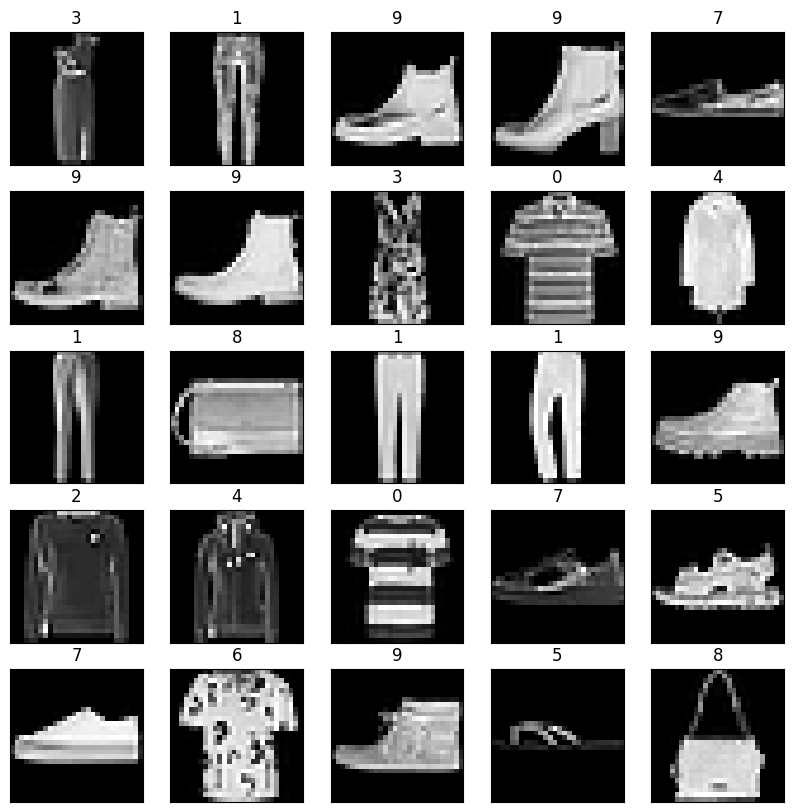

In [20]:
n= X_train.shape[0]
fig,axs= plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        p= np.random.randint(0,n)
        axs[i,j].imshow(X_train[p,:,:],cmap='grey')
        axs[i,j].set(title=(f"{Y_train[p]}"),xticks=[],yticks=[])

plt.show()

In [21]:
num_cats=10
Y_train= to_categorical(Y_train,10)
Y_test= to_categorical(Y_test,10)

In [47]:
in_layer= Input((28,28))

x= Flatten()(in_layer)
x= Dense(256,activation='relu')(x)
x= Dense(256,activation='relu')(x)

out_layer= Dense(num_cats,activation='softmax')(x)

model= Model(in_layer,out_layer)

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history1= model.fit(X_train,Y_train,epochs=20,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7764 - loss: 0.6616 - val_accuracy: 0.8490 - val_loss: 0.4259
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8645 - loss: 0.3719 - val_accuracy: 0.8519 - val_loss: 0.4023
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8823 - loss: 0.3226 - val_accuracy: 0.8688 - val_loss: 0.3610
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8893 - loss: 0.3027 - val_accuracy: 0.8656 - val_loss: 0.3792
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8968 - loss: 0.2809 - val_accuracy: 0.8707 - val_loss: 0.3562
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9009 - loss: 0.2659 - val_accuracy: 0.8839 - val_loss: 0.3347
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9055 - loss: 0.2523 - val_accuracy: 0.8828 - val_loss: 0.3304
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.2352 - val_accuracy: 0.

In [60]:
in_layer= Input((28,28))

x= Flatten()(in_layer)
x= Dense(256,activation='relu')(x)
x= Dense(256,activation='relu')(x)

out_layer= Dense(num_cats,activation='relu')(x)

model= Model(in_layer,out_layer)

model.compile(loss='mse',optimizer=Adam(),metrics=['accuracy'])
model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history2= model.fit(X_train,Y_train,epochs=20,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8424 - loss: 0.0196 - val_accuracy: 0.8851 - val_loss: 0.0173
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9382 - loss: 0.0102 - val_accuracy: 0.8879 - val_loss: 0.0174
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9396 - loss: 0.0098 - val_accuracy: 0.8899 - val_loss: 0.0168
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9400 - loss: 0.0098 - val_accuracy: 0.8880 - val_loss: 0.0171
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9417 - loss: 0.0095 - val_accuracy: 0.8930 - val_loss: 0.0165
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9427 - loss: 0.0092 - val_accuracy: 0.8912 - val_loss: 0.0169
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9466 - loss: 0.0088 - val_accuracy: 0.8918 - val_loss: 0.0168
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9479 - loss: 0.0086 - val_accuracy: 0.

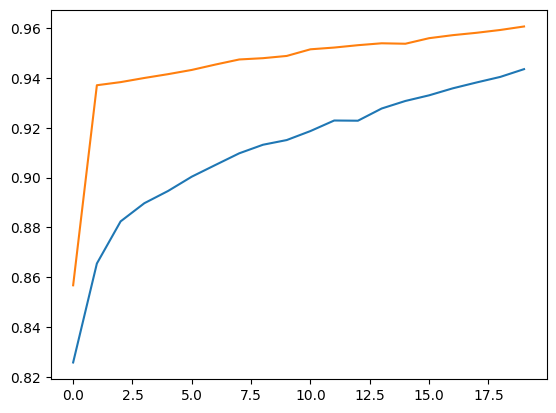

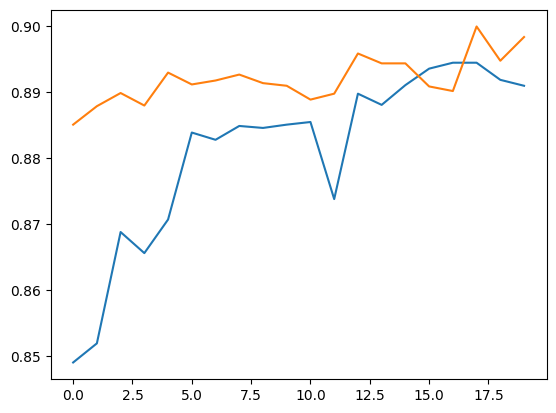

In [68]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.show()

plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.show()

In [72]:
in_layer= Input((28,28))

x= Flatten()(in_layer)
x= Dense(256,activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(256,activation='relu')(x)
x= BatchNormalization()(x)
x= Dense(256,activation='relu')(x)
x= Dropout(0.2)(x)

out_layer= Dense(10,activation='softmax')(x)

model= Model(in_layer,out_layer)

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,138 (1.28 MB)

 Trainable params: 335,626 (1.28 MB)

 Non-trainable params: 512 (2.00 KB)

In [73]:
history3= model.fit(X_train,Y_train,epochs=20,batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7502 - loss: 0.6843 - val_accuracy: 0.8311 - val_loss: 0.4545
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8468 - loss: 0.4234 - val_accuracy: 0.8555 - val_loss: 0.3949
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8598 - loss: 0.3781 - val_accuracy: 0.8611 - val_loss: 0.3788
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8707 - loss: 0.3517 - val_accuracy: 0.8644 - val_loss: 0.3645
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8735 - loss: 0.3358 - val_accuracy: 0.8687 - val_loss: 0.3654
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8801 - loss: 0.3264 - val_accuracy: 0.8674 - val_loss: 0.3502
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8848 - loss: 0.3137 - val_accuracy: 0.8803 - val_loss: 0.3347
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8876 - loss: 0.3022 - val_accuracy: 0.

In [92]:
in_layer= Input((28,28))

x= Flatten()(in_layer)
x= Dense(256,activation='relu',kernel_regularizer=l2(0.001))(x)
x= BatchNormalization()(x)
x= Dense(256,activation='relu',kernel_regularizer=l2(0.001))(x)
x= BatchNormalization()(x)
x= Dense(256,activation='relu',kernel_regularizer=(l2(0.001)))(x)

out_layer= Dense(10,activation='softmax')(x)

model= Model(in_layer,out_layer)

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,162 (1.29 MB)

 Trainable params: 336,138 (1.28 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [93]:
history4= model.fit(X_train,Y_train,epochs=20,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8074 - loss: 1.2923 - val_accuracy: 0.8248 - val_loss: 0.9140
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8647 - loss: 0.7401 - val_accuracy: 0.8170 - val_loss: 0.7390
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8715 - loss: 0.5647 - val_accuracy: 0.7916 - val_loss: 0.7515
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8782 - loss: 0.4747 - val_accuracy: 0.8427 - val_loss: 0.5722
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8776 - loss: 0.4501 - val_accuracy: 0.8413 - val_loss: 0.5280
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8867 - loss: 0.4111 - val_accuracy: 0.8466 - val_loss: 0.5049
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8868 - loss: 0.4004 - val_accuracy: 0.8307 - val_loss: 0.5814
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8874 - loss: 0.3976 - val_accuracy: 0.

In [106]:
model= Sequential([
    Input((28,28)),
    Flatten(),
    Dense(196,activation='relu'),
    Dropout(0.1),
    Dense(196,activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(196,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 196)            │       153,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 196)            │        38,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 196)            │           784 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 196)            │        38,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 10)             │         1,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,838 (913.43 KB)

 Trainable params: 233,446 (911.90 KB)

 Non-trainable params: 392 (1.53 KB)

In [107]:
checkpoint= ModelCheckpoint(
    'best_model_FMNIST.keras',
    monitor= 'val_accuracy',
    save_best_only= True,
    mode= 'max'
    )

history5=model.fit(
    X_train,Y_train,
    epochs=40,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks= [checkpoint]
)



Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7542 - loss: 0.6963 - val_accuracy: 0.8463 - val_loss: 0.4300
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8524 - loss: 0.4029 - val_accuracy: 0.8435 - val_loss: 0.4267
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8674 - loss: 0.3622 - val_accuracy: 0.8569 - val_loss: 0.3791
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8741 - loss: 0.3353 - val_accuracy: 0.8651 - val_loss: 0.3867
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8822 - loss: 0.3138 - val_accuracy: 0.8742 - val_loss: 0.3447
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8883 - loss: 0.2972 - val_accuracy: 0.8809 - val_loss: 0.3265
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8929 - loss: 0.2873 - val_accuracy: 0.8756 - val_loss: 0.3369
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8955 - loss: 0.2791 - val_accuracy: 0.

In [110]:
best_model= keras.models.load_model('best_model_FMNIST.keras')

best_model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.3134


[0.30715906620025635, 0.9002000093460083]

In [128]:
def objective(trial):
    num_layers= trial.suggest_int('num_layers',1,3)
    width= trial.suggest_int('width',49,192)
    activation= trial.suggest_categorical('activation',['relu','sigmoid'])
    dropout_rate= trial.suggest_float('dropout_rate',0.,0.5)
    loss= trial.suggest_categorical('loss',['mse','categorical_crossentropy'])
    lr= trial.suggest_float('learning_rate',1e-5,1e-1,log=True)
    batch_size= trial.suggest_categorical('batch_size',[32,48,64,96,128])

    
    model= Sequential([Input((28,28))])
    model.add(Flatten())

    for i in range(num_layers):
        model.add(Dense(width,activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=lr),loss=loss,metrics=['accuracy'])

    history= model.fit(X_train,Y_train,epochs=10,batch_size=batch_size,verbose=0)

    accuracy= model.evaluate(X_test,Y_test,verbose=0)[1]

    return accuracy


study= optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

[I 2024-11-21 00:59:04,979] A new study created in memory with name: no-name-7141470c-c4bc-462b-a28a-f1bd0b047262
[I 2024-11-21 00:59:46,637] Trial 0 finished with value: 0.8784000277519226 and parameters: {'num_layers': 2, 'width': 151, 'activation': 'relu', 'dropout_rate': 0.07056158896193615, 'loss': 'categorical_crossentropy', 'learning_rate': 0.0014098337275128157, 'batch_size': 32}. Best is trial 0 with value: 0.8784000277519226.
[I 2024-11-21 01:00:09,073] Trial 1 finished with value: 0.8772000074386597 and parameters: {'num_layers': 2, 'width': 98, 'activation': 'relu', 'dropout_rate': 0.034567628684537055, 'loss': 'mse', 'learning_rate': 0.00022723397160586187, 'batch_size': 64}. Best is trial 0 with value: 0.8784000277519226.
[I 2024-11-21 01:00:41,721] Trial 2 finished with value: 0.875 and parameters: {'num_layers': 2, 'width': 68, 'activation': 'relu', 'dropout_rate': 0.08275225754149423, 'loss': 'categorical_crossentropy', 'learning_rate': 0.0003282268089251653, 'batch_si

In [132]:
model_params= study.best_params
model_params

In [135]:
num_layers= model_params['num_layers']
width= model_params['width']
activation= model_params['activation']
dropout_rate= model_params['dropout_rate']
loss= model_params['loss']
lr= model_params['learning_rate']
batch_size= model_params['batch_size']


model= Sequential([Input((28,28))])
model.add(Flatten())
for i in range(num_layers):
    model.add(Dense(width,activation=activation))
    model.add(Dropout(dropout_rate))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer=Adam(learning_rate=lr),loss=loss,metrics=['accuracy'])
history= model.fit(X_train,Y_train,epochs=20,batch_size=batch_size,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7644 - loss: 0.6579 - val_accuracy: 0.8555 - val_loss: 0.4094
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8555 - loss: 0.3976 - val_accuracy: 0.8648 - val_loss: 0.3738
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8700 - loss: 0.3535 - val_accuracy: 0.8564 - val_loss: 0.3972
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8771 - loss: 0.3289 - val_accuracy: 0.8693 - val_loss: 0.3646
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8881 - loss: 0.3016 - val_accuracy: 0.8740 - val_loss: 0.3478
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8894 - loss: 0.2964 - val_accuracy: 0.8731 - val_loss: 0.3437
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8931 - loss: 0.2865 - val_accuracy: 0.8851 - val_loss: 0.3183
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8995 - loss: 0.2684 - 